In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#custom functions
from helpers import*
%matplotlib inline

In [2]:
forest_data_path = glob.glob("data/forest/*")
tallbuilding_data_path = glob.glob("data/tallbuilding/*")
highway_data_path = glob.glob("data/highway/*")

In [3]:
cA = []
for item in forest_data_path:
    cA.append(np.loadtxt(item))

cB = []
for item in tallbuilding_data_path:
    cB.append(np.loadtxt(item))
    
cC = []
for item in highway_data_path:
    cC.append(np.loadtxt(item))
    
cA = np.array(cA)
cB = np.array(cB)
cC = np.array(cC)

cA_train,cA_test = train_test_split(cA, test_size=0.3, random_state=42)
cB_train,cB_test = train_test_split(cB, test_size=0.3, random_state=42) 
cC_train,cC_test = train_test_split(cC, test_size=0.3, random_state=42) 

In [16]:
XA = cA_train.reshape(-1,23)
XB = cB_train.reshape(-1,23)
XC = cC_train.reshape(-1,23)

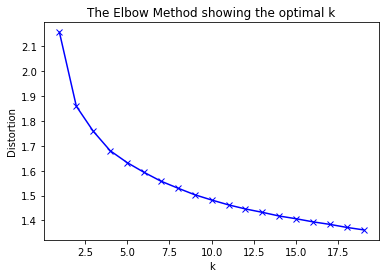

In [9]:
plot_elbow(XA, 20)
plot_elbow(XB, 20)
plot_elbow(XC, 20)

### Applying PCA to data

[  42.45   50.17   56.2    61.8    66.92   71.41   75.3    79.14   82.63
   85.69   88.29   90.55   92.63   94.39   95.76   97.01   97.98   98.7
   99.38   99.85   99.99  100.    100.  ]


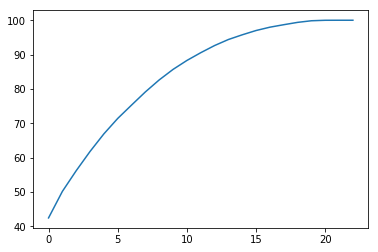

[ 35.99  47.59  54.39  60.26  65.16  69.53  73.72  77.61  81.34  84.39
  87.23  89.75  92.2   94.34  96.14  97.52  98.46  99.02  99.49  99.87
  99.97  99.98  99.98]


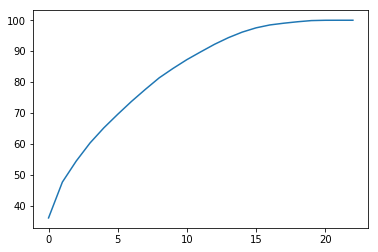

[  35.61   47.69   54.57   59.85   65.03   69.55   73.88   77.81   81.53
   84.94   88.03   90.61   92.84   94.64   96.27   97.62   98.41   99.02
   99.49   99.89   99.97  100.    100.  ]


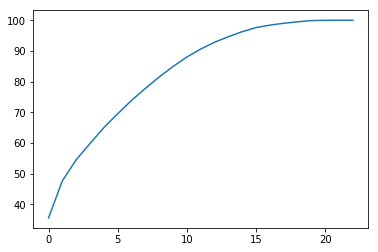

In [17]:
def pca_x(X):
    X = scale(X)
    pca = PCA(n_components=23)
    pca.fit(X)

    #The amount of variance that each PC explains
    var= pca.explained_variance_ratio_

    #Cumulative Variance explains
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    print(var1)
    plt.plot(var1)
    plt.show()
    
pca_x(XA)
pca_x(XB)
pca_x(XC)

In [18]:
def transform_x(X):
    pca = PCA(n_components=10)
    pca.fit(X)
    return pca.fit_transform(X)

X1A = transform_x(XA)
X1B = transform_x(XB)
X1C = transform_x(XC)

In [19]:
#A 40, #B 40, #C 40
gA_new = pipeline(X1A, K=7, error=40)
gB_new = pipeline(X1B, K=7, error=40)
gC_new = pipeline(X1C, K=7, error=40)

[ 1216.07740851]
[ 1216.07740851]
[ 383.73054938]
[ 203.11571032]
[ 134.52702599]
[ 96.84298128]
[ 72.1080374]
[ 55.84614579]
[ 45.73645846]
Iterations : 9
[ 1034.07476665]
[ 1034.07476665]
[ 431.86087277]
[ 274.7053692]
[ 198.96313163]
[ 150.16334225]
[ 117.78102536]
[ 100.29816012]
[ 89.69473426]
[ 89.39784011]
[ 91.84185153]
[ 93.13627898]
[ 89.25952953]
[ 80.84373175]
[ 73.30358546]
[ 66.02630147]
[ 56.81325351]
[ 49.01043584]
[ 44.15222031]
[ 40.43446008]
Iterations : 20
[ 849.66249344]
[ 849.66249344]
[ 414.81892007]
[ 303.17190575]
[ 248.91454821]
[ 226.02357949]
[ 197.27131826]
[ 154.39119291]
[ 98.0758747]
[ 65.99497041]
[ 42.49353842]
Iterations : 11


In [13]:
s = g_new.getsigma()

In [21]:
temp = X1[0:36]

def class_scores(gmm, img_features):
    temp_sum = 0
    for i in temp:
        temp_sum+=gmm.predict_scores(i)
    return temp_sum
    
print(class_scores(gA_new, temp), class_scores(gB_new, temp), class_scores(gC_new, temp))

[[  1.80134425e-07]] [[  3.42771153e-06]] [[  1.46709423e-05]]


In [ ]:


while not success:
    try next.plan

